In [1]:
import pandas
import numpy
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_moons, make_blobs


from backpropagation import Var
from neuralNetwork import Neuron, Layer, MLP
from graph import draw_graph


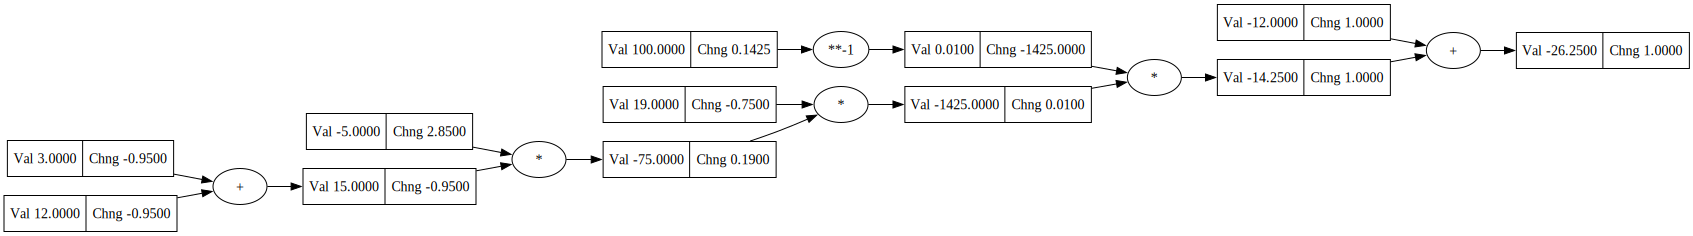

In [12]:
a = Var(3)
b = Var(12)
c = Var(-5)
d = Var(100)
e = Var(-12)
f = Var(19)


z = a + b
y = z * c * f
x = y / d
final = x + e
final.back()


draw_graph(final)

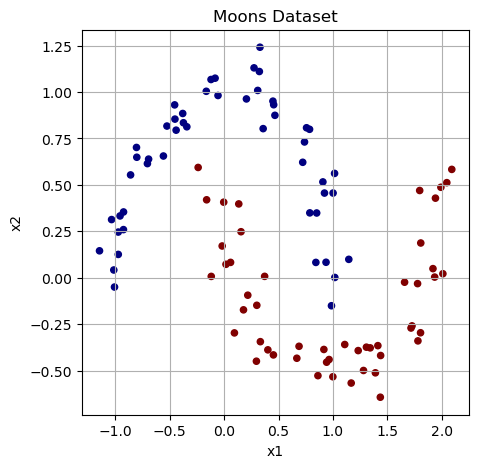

iteration 0, Loss: 69.8106
iteration 10, Loss: 30.3421
iteration 20, Loss: 25.4885
iteration 30, Loss: 21.1355
iteration 40, Loss: 19.3663
iteration 50, Loss: 8.3297
iteration 60, Loss: 7.4092
iteration 70, Loss: 6.6360
iteration 80, Loss: 6.2830
iteration 90, Loss: 4.6975


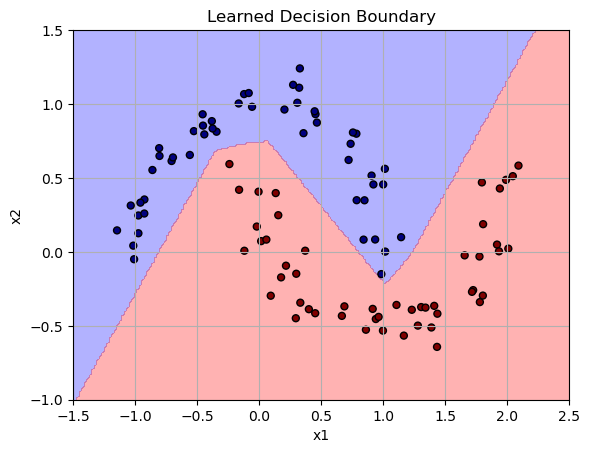

In [14]:
random.seed(42)
X, Y = make_moons(n_samples=100, noise=0.1)
Y = Y * 2 - 1 

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=Y, s=20, cmap='jet')
plt.title("Moons Dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()


model = MLP(2, [4, 8, 1])  


for i in range(100):
    total_loss = 0.0
    for x, y in zip(X, Y):
        x_vars = [Var(float(xi)) for xi in x]
        y_true = Var(float(y))

        y_pred = model(x_vars)
        loss = (y_pred - y_true) ** 2
        total_loss += loss.data

        model.zero_chng()
        loss.back()
        for p in model.parameters():
            p.data -= 0.05 * p.chng 

    if i % 10 == 0:
        print(f"iteration {i}, Loss: {total_loss:.4f}")


xx, yy = np.meshgrid(np.linspace(-1.5, 2.5, 200), np.linspace(-1.0, 1.5, 200))
zz = np.zeros_like(xx)

for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        x_input = [Var(float(xx[i, j])), Var(float(yy[i, j]))]
        output = model(x_input).data
        zz[i, j] = 1 if output > 0 else 0

plt.contourf(xx, yy, zz, levels=[-0.1, 0.5, 1.1], colors=["blue", "red"], alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="jet", edgecolor='k', s=25)
plt.title("Learned Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()